# **COFFEE SALES ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("coffe sales.csv")
df.head()

,transaction_date,transaction_time,cash_type,card,money,coffee_name,Unnamed: 6
0,01-03-2024,10:15:51,card,ANON-0000-0000-0001,38.7,Latte,NaN
1,01-03-2024,12:19:23,card,ANON-0000-0000-0002,38.7,Hot Chocolate,NaN
2,01-03-2024,12:20:18,card,ANON-0000-0000-0002,38.7,Hot Chocolate,NaN
3,01-03-2024,13:46:33,card,ANON-0000-0000-0003,28.9,Americano,NaN
4,01-03-2024,13:48:15,card,ANON-0000-0000-0004,38.7,Latte,NaN


In [3]:
df.describe()

,money,Unnamed: 6
count,1133.000000,0.0
mean,33.105808,NaN
std,5.035366,NaN
min,18.120000,NaN
25%,28.900000,NaN
50%,32.820000,NaN
75%,37.720000,NaN
max,40.000000,NaN


In [4]:
df.columns

Index(['transaction_date', 'transaction_time', 'cash_type', 'card', 'money',
       'coffee_name', 'Unnamed: 6'],
      dtype='object')

In [5]:
df.isnull().sum()

transaction_date       0
transaction_time       0
cash_type              0
card                  89
money                  0
coffee_name            0
Unnamed: 6          1133
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  1133 non-null   object 
 1   transaction_time  1133 non-null   object 
 2   cash_type         1133 non-null   object 
 3   card              1044 non-null   object 
 4   money             1133 non-null   float64
 5   coffee_name       1133 non-null   object 
 6   Unnamed: 6        0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 62.1+ KB


### Data Cleaning

In [7]:
#convert date
df['transaction_date']= pd.to_datetime(df['transaction_date'], errors='coerce', dayfirst= True)

# convert time
df['transaction_time'] = pd.to_datetime( df['transaction_time'],format='%H:%M:%S',errors='coerce').dt.time

### Feature Engineering

In [8]:
# creating new columns
df['order_day'] = df['transaction_date'].dt.day_name()
df['order_month'] = df['transaction_date'].dt.month
df['order_year'] = df['transaction_date'].dt.year
df.head()


,transaction_date,transaction_time,cash_type,card,money,coffee_name,Unnamed: 6,order_day,order_month,order_year
0,2024-03-01,10:15:51,card,ANON-0000-0000-0001,38.7,Latte,NaN,Friday,3,2024
1,2024-03-01,12:19:23,card,ANON-0000-0000-0002,38.7,Hot Chocolate,NaN,Friday,3,2024
2,2024-03-01,12:20:18,card,ANON-0000-0000-0002,38.7,Hot Chocolate,NaN,Friday,3,2024
3,2024-03-01,13:46:33,card,ANON-0000-0000-0003,28.9,Americano,NaN,Friday,3,2024
4,2024-03-01,13:48:15,card,ANON-0000-0000-0004,38.7,Latte,NaN,Friday,3,2024


In [9]:
total_revenue = round(df['money'].sum())
total_orders = df['transaction_date'].count()
avg_order_value= round(total_revenue / total_orders, 2)
print(f'Total revenue:' ,total_revenue)
print(f'Total order:' ,total_orders)
print(f'Avg order value:' ,avg_order_value)

Total revenue: 37509
Total order: 1133
Avg order value: 33.11


### Data visualization

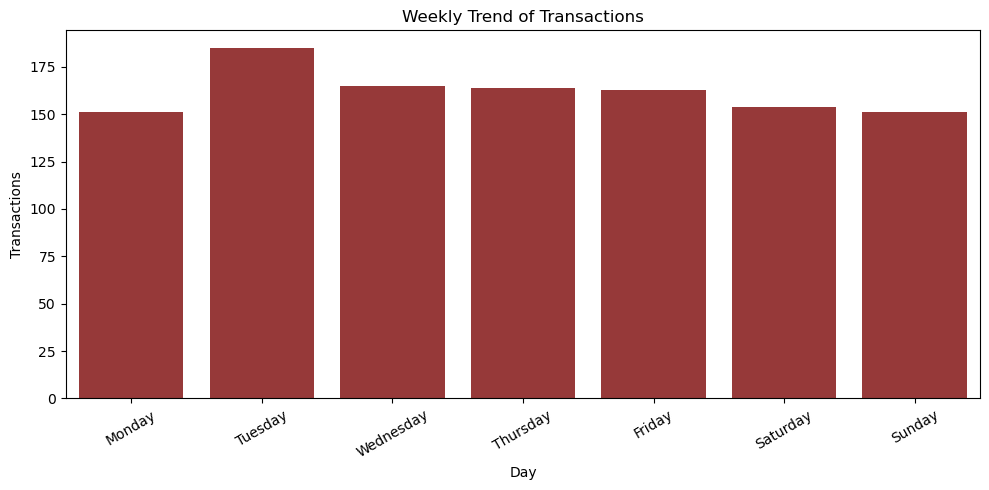

In [20]:
# weekly trend
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekly = (
    df.groupby('order_day')
      .size()
      .reindex(day_order)
      .reset_index(name='transactions')
)

plt.figure(figsize=(10,5))
sns.barplot(x='order_day', y='transactions', data=weekly, color='brown')
plt.title("Weekly Trend of Transactions")
plt.xlabel("Day")
plt.ylabel("Transactions")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

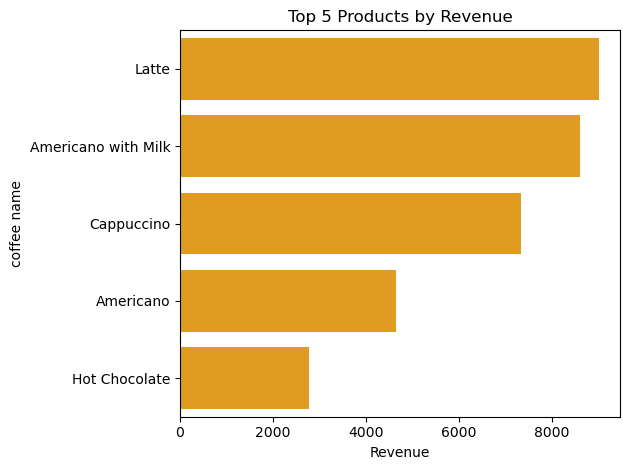

In [18]:
# Product Performance (Revenue-based)

top_products = (
    df.groupby('coffee_name')['money']
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .reset_index()
)

sns.barplot(x='money', y='coffee_name', data=top_products, color='orange')
plt.title("Top 5 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("coffee name")
plt.tight_layout()
plt.show()

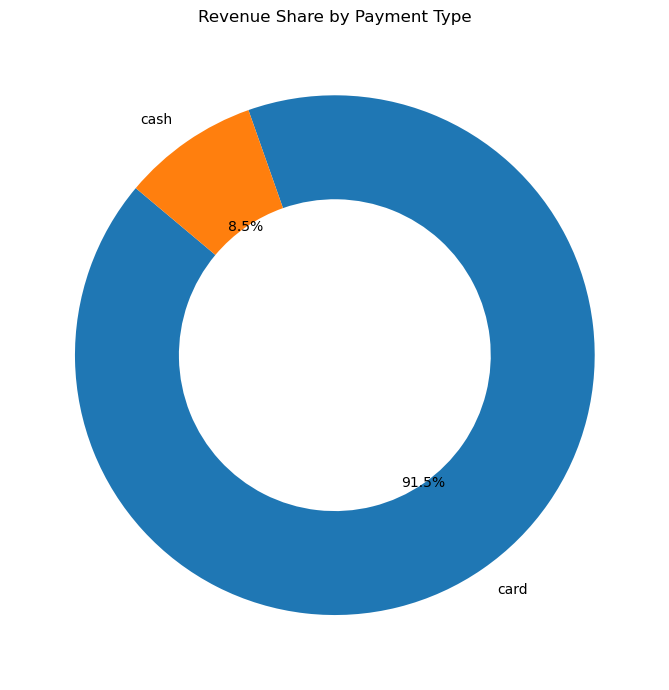

In [12]:
# Revenue by Cash Type (Payment Method)
cash_rev = df.groupby('cash_type')['money'].sum().reset_index()

plt.figure(figsize=(7,7))
plt.pie(
    cash_rev['money'],
    labels=cash_rev['cash_type'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'width': 0.4}
)
plt.title("Revenue Share by Payment Type")
plt.tight_layout()
plt.show()

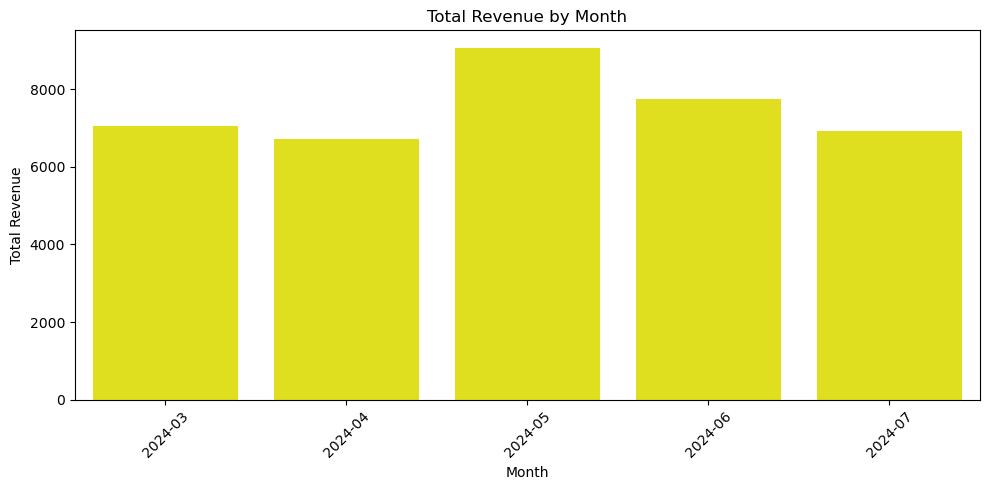

In [ ]:
# Total Revenue by month

monthly_rev = (
    df.groupby([df['transaction_date'].dt.to_period('M')])['money']
      .sum()
      .reset_index()
)

monthly_rev['year_month'] = monthly_rev['transaction_date'].astype(str)

plt.figure(figsize=(10,5))
sns.barplot(x='year_month', y='money', data=monthly_rev, color= 'yellow')
plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()